In [15]:
import pandas as pd

import functions.generate_graphs as gg
import functions.hyphotesis_tester as ht

## Load Data

In [16]:
FOLDER_PATH = "baseline"
TEST_TYPE = "Baseline"

# json
jGP = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")

# protobuf
pGP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")

# protobuf v2
pGPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")

pSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")

pGSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf.csv")
pGJson = pd.read_csv(f"../{FOLDER_PATH}/summary_post_json.csv")
pGSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf_v3.csv")

## Generate Graphs

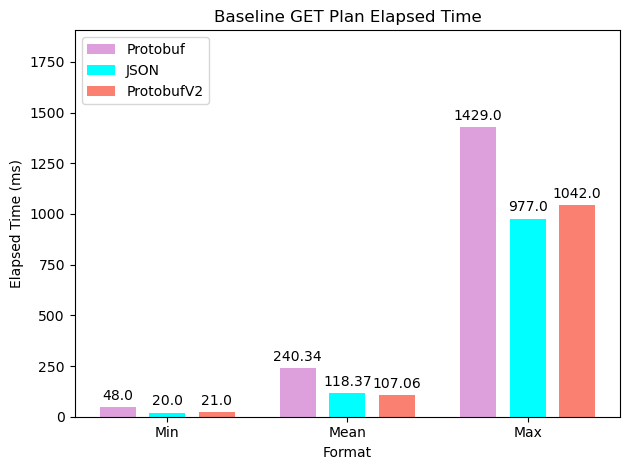

In [17]:
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)

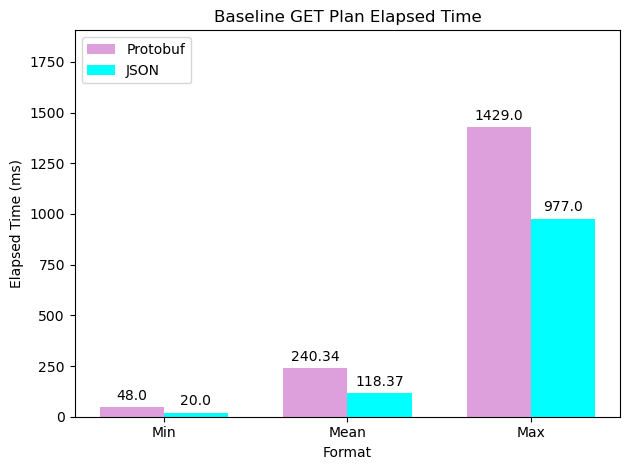

In [18]:
gg.create_min_max_mean_graph(pGP,jGP,f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")

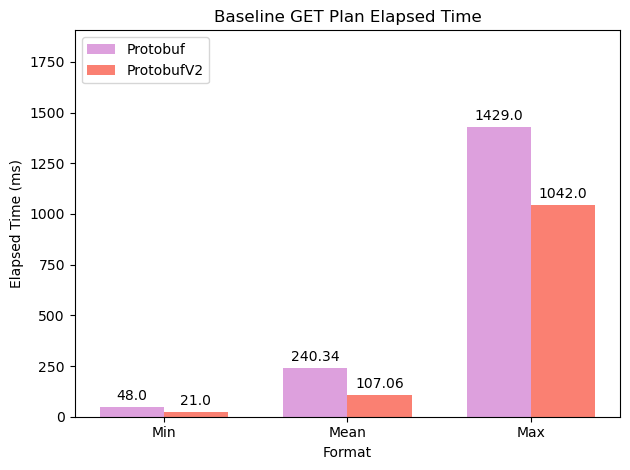

In [19]:
gg.create_min_max_mean_graph(pGP,pGPv2,f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", labels=["Protobuf", "ProtobufV2"],colors=["plum","salmon"])

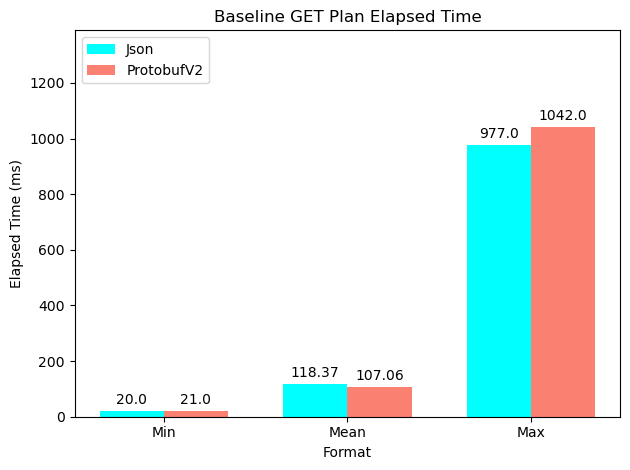

In [20]:
gg.create_min_max_mean_graph(jGP,pGPv2,f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", labels=["Json", "ProtobufV2"],colors=["cyan","salmon"])

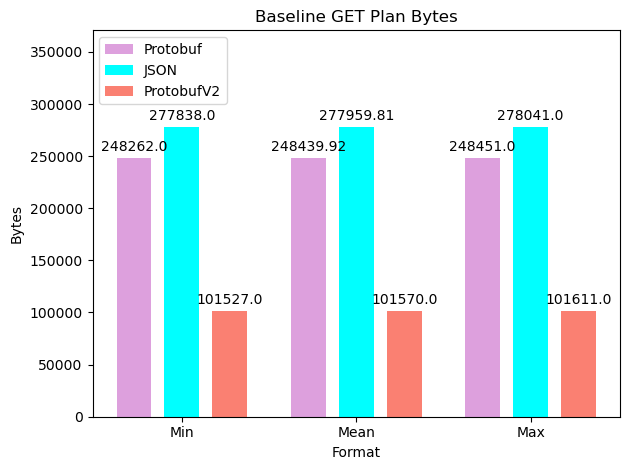

In [21]:
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

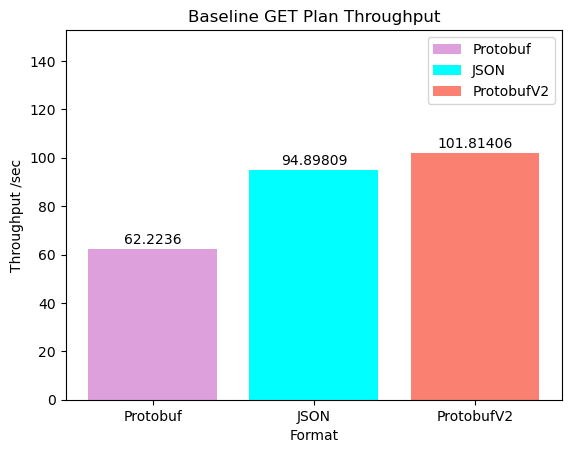

In [22]:
gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,0,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")

## Hyphotesis Tests - Baseline GET Plan

**Does the data obtained have a significant perfomance between them?**

In [27]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")


p_value - 1.1728499000847294e-71 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.


1.1728499000847294e-71

**Is Protobuf faster than json?**

In [28]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"Protobuf is not faster than JSON", "Protobuf is faster than JSON",'less')


p_value - 1.0 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster than JSON'.


1.0

**Is ProtobufV2 faster than json?**

In [29]:
ht.hyphtesis_test([pGSPv2['elapsed'],jGSP['elapsed']],"ProtobufV2 is not faster than JSON", "ProtobufV2 is faster than JSON",'less')


p_value - 2.464603729436772e-17 < 0.5 - H0 is rejected, therefore 'ProtobufV2 is faster than JSON'.


2.464603729436772e-17

**Does the ProtobufV2 payload take up fewer bytes?**

In [30]:
ht.hyphtesis_test([pGSPv2['bytes'],jGSP['bytes']],"ProtobufV2 does not result in fewer received bytes compared to JSON", "ProtobufV2 results in fewer received bytes compared to JSON",'less')


p_value - 0.0 < 0.5 - H0 is rejected, therefore 'ProtobufV2 results in fewer received bytes compared to JSON'.


0.0